<a href="https://colab.research.google.com/github/isaackchirchir/Calculator/blob/master/DS_Lifecycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Data Science Project Walkthrough**</center>

---





## Business Understanding


> This can also be thought of problem identification,problem selection. Find out more about the problem.



In [0]:
print("hello moringa")

hello moringa


Link to the datasets

Example dataset: http://bit.ly/credit_score_dataset_moringa

Exercise variable description: http://bit.ly/VariableDefinitions

Exercise dataset: http://bit.ly/FinancialDataset


## Data understanding


> Getting to know what data we would require or rather what can we understand from the data we have



In [0]:
# Importing the needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# Loading the csv data file into a dataframe
df = pd.read_csv("Default Rate.csv") # df is the variable that stores the dataframe

In [0]:
df.head(5) # Prints out first five lines of the data loaded

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [0]:
df.shape # Prints out the dataframe's Rows and Columns

(10000, 5)

In [0]:
df.columns # prints out the columns we have in the dataframe

Index(['Unnamed: 0', 'default', 'student', 'balance', 'income'], dtype='object')

Challenge


Exploratory data analysis

In [0]:
columns = ['default', 'student', 'balance', 'income']

#analysis of columns
def summary(columns):
  for c in columns:
    print(c)
    print(pd.value_counts(df[c]))
    print(df[c].describe())
    print("\n*******************")

summary(columns)

default
No     9667
Yes     333
Name: default, dtype: int64
count     10000
unique        2
top          No
freq       9667
Name: default, dtype: object

*******************
student
No     7056
Yes    2944
Name: student, dtype: int64
count     10000
unique        2
top          No
freq       7056
Name: student, dtype: object

*******************
balance
0.000000       499
1500.894533      1
1273.581981      1
1033.455043      1
500.252724       1
              ... 
619.540642       1
982.514587       1
194.193555       1
275.063482       1
701.691432       1
Name: balance, Length: 9502, dtype: int64
count    10000.000000
mean       835.374886
std        483.714985
min          0.000000
25%        481.731105
50%        823.636973
75%       1166.308386
max       2654.322576
Name: balance, dtype: float64

*******************
income
24393.315952    1
53542.412719    1
36340.651071    1
29899.822157    1
37489.722114    1
               ..
32497.448858    1
45104.094028    1
27262.057981   

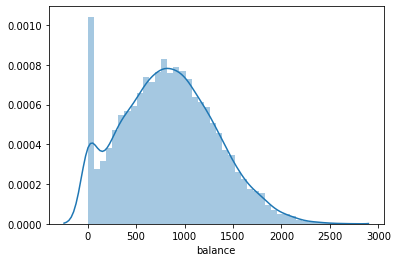

In [0]:
sns.distplot(df['balance'])



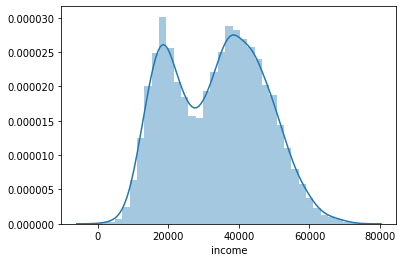

In [0]:
sns.distplot(df['income'])

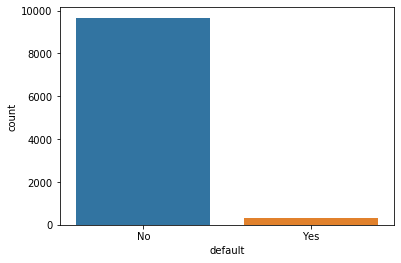

In [0]:
# sns.countplot(x='default', data=df)
sns.barplot(x=df.default.value_counts().index, y=df.default.value_counts())

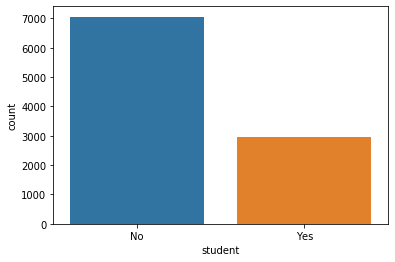

In [0]:
sns.countplot(x='student', data=df)

Conmparing different variables

In [0]:
#Groupby by default on students

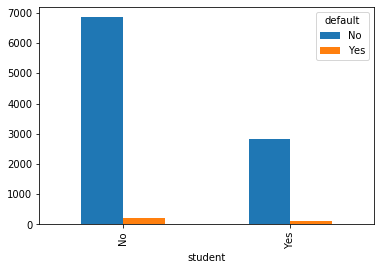

In [0]:
df.groupby('default').student.value_counts().unstack(0).plot.bar()

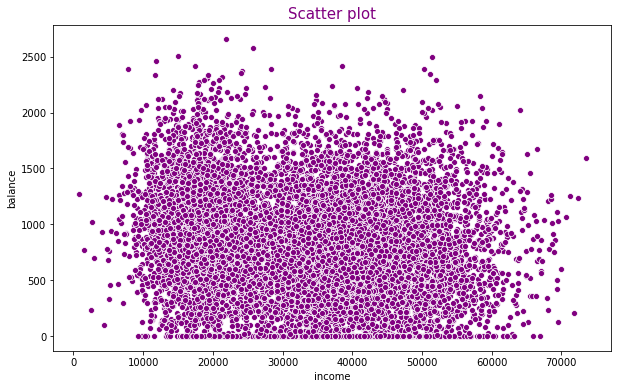

In [0]:
fig = plt.figure(figsize = (10, 6))
sns.scatterplot(x= "income", y= "balance", data=df, color = 'purple')
plt.title('Scatter plot', color = 'purple', fontdict={'size': 15})
plt.show()

## Data Preparation


> Getting the data to a form that we would use/ make use of.



In [0]:
#missing values
df.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [0]:
#if there were null values
#df.dropna()

In [0]:
df.dtypes

Unnamed: 0      int64
default        object
student        object
balance       float64
income        float64
dtype: object

In [0]:
df.astype({'default': 'category', 'student': 'category'}).dtypes

Unnamed: 0       int64
default       category
student       category
balance        float64
income         float64
dtype: object

In [0]:
#dropping irrelevant columns
df = df.drop(columns='Unnamed: 0')

In [0]:
df.duplicated().sum()

0

In [0]:
#if duplicates were present
#df.drop_duplicates()

In [0]:
#Getting data for the model
features = df[df.columns.difference(["default"])]
label = df['default']

#Encoding
features = pd.get_dummies(features)
features.head()

,balance,income,student_No,student_Yes
0,729.526495,44361.625074,1,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,1,0
3,529.250605,35704.493935,1,0
4,785.655883,38463.495879,1,0


## Modeling


> Using machine learning for predictions.




In [0]:
#Import models from scikit learn module:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size = 0.3, random_state = 0)

# Decison tree model
model = DecisionTreeClassifier()
model.fit(features_train,label_train)

pred1_train = model.predict(features_train)
pred1_test = model.predict(features_test)

In [0]:
#Decision tree confusion matrix(train)
pd.crosstab(label_train, pd.Series(pred1_train), rownames = ['ACTUAL'],colnames=['PRED'])

PRED,No,Yes
ACTUAL,,
No,4574,154
Yes,153,5


In [0]:
#Decision tree confusion matrix(test)
pd.crosstab(label_test,pd.Series(pred1_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,No,Yes
ACTUAL,,
No,831,32
Yes,31,4


## Evaluation


> How well is our model doing



In [0]:
#accuracy
accuracy = metrics.accuracy_score(label_test, pred1_test)
print("Accuracy : %s" % "{0:.4%}".format(accuracy))

Accuracy : 95.6667%


## Deployment


> Saving and testing your model with real life data

